In [1]:
DATA_LOCATION = "/work/mk423/SucroseCountdown/lpne-data-analysis/"
LPNE_LOCATION = "/work/mk423/SucroseCountdown/lpne-data-analysis/"
CLASS_DATA_LOCATION = "/work/mk423/SucroseCountdown/Dalton/ClassData/ClassData/"
EVENTS_FILE = "/work/mk423/SucroseCountdown/Dalton/Anticipation_Events.mat"
SAVE_DATA_LOCATION = "/work/mk423/SucroseCountdown/"

import numpy as np
import pickle
import pandas as pd
from scipy.io import loadmat
import os, sys
import matplotlib.pyplot as plt

sys.path.append(LPNE_LOCATION)

import data_tools

In [2]:
csv_files = [file for file in os.listdir(CLASS_DATA_LOCATION) if file.split(".")[-1] == "csv"]
mat_feature_files = np.sort([file for file in os.listdir(DATA_LOCATION) if file.split(".")[-1] == "mat"])
json_feature_files = np.sort([file for file in os.listdir(DATA_LOCATION) if file.split(".")[-1] == "json"])

In [3]:
for matfile in mat_feature_files:
    
    try:
        X_psd,X_coh,X_gc,labels = data_tools.load_data(DATA_LOCATION + matfile, feature_list = ["power","coherence","granger"])

        mouse = matfile.split("_")[0]

        countdownEvents = np.zeros(len(labels['windows']['expDate']))
        pumpEvents = np.zeros(len(labels['allWindows']['expDate']))

        mouse_class_files = [file for file in csv_files if file.split("_")[0]==mouse]

        mouse_num_events = 0

        for file in mouse_class_files:
            df = pd.read_csv(CLASS_DATA_LOCATION + file)

            pump_times = df["Pump"].to_numpy()
            pump_times = np.around(pump_times / 1000)

            expDate = file.split("_")[1]

            date_time = np.array(labels['windows']['time'])[np.array(labels['windows']['expDate'])==expDate]
            day_events = day_events = np.zeros(date_time.shape)
            day_num_events = len(pump_times)

            dayPumpEvents = np.zeros(np.array(labels['allWindows']['time']).shape)[np.array(labels['allWindows']['expDate'])==expDate]
            if dayPumpEvents.shape[0] > 0:
                dayPumpEvents[pump_times.astype(int)] = 1

            for event in pump_times:
                event_countdown_5s = np.logical_and(date_time<=event,date_time>(event-5))
                day_events = np.logical_or(event_countdown_5s,day_events)

            mouse_mask = np.array(labels['windows']['mouse'])==mouse
            expDate_mask = np.array(labels['windows']['expDate'])==expDate

            mouse_mask_aw = np.array(labels['allWindows']['mouse'])==mouse
            expDate_mask_aw = np.array(labels['allWindows']['expDate'])==expDate

            event_mask = np.logical_and(mouse_mask,expDate_mask)
            event_mask_aw = np.logical_and(mouse_mask_aw,expDate_mask_aw)

            pumpEvents[event_mask_aw==1] = dayPumpEvents
            countdownEvents[event_mask==1] = day_events

            mouse_num_events += day_num_events

        print("Mouse: {}, Num CD Windows / Num Events: {}".format(mouse, np.sum(countdownEvents) / mouse_num_events))

        saveDict = {
            "X_psd":X_psd,
            "X_coh":X_coh,
            "X_gc":X_gc,
            "y_time":np.array(labels['windows']['time']),
            "y_mouse":np.array(labels['windows']['mouse']),
            "y_expDate":np.array(labels['windows']['expDate']),
            "y_countDown":countdownEvents,
            "y_pump_allWindows":pumpEvents,
            "y_time_aw":np.array(labels['allWindows']['time']),
            "y_mouse_aw":np.array(labels['allWindows']['mouse']),
            "y_expDate_aw":np.array(labels['allWindows']['expDate']),
            "powFeatures":labels['powerFeatures'],
            "cohFeatures":labels["cohFeatures"],
            "gcFeatures":labels["gcFeatures"],
            "areas":labels["area"],
        }

        with open(SAVE_DATA_LOCATION + "{}_SucroseCountDown_Data.pkl".format(mouse),"wb") as f:
            pickle.dump(saveDict,f,protocol=4)
            
    except:
        print("Failed to Process File: {}".format(matfile))

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features


/work/mk423/SucroseCountdown/lpne-data-analysis/data_tools.py:141: UserWarning: Raw Granger causality values loaded; if you want exponentiated or capped features, you must do that yourself
  warnings.warn("Raw Granger causality values loaded; if you want exponentiated or capped features, you must do that yourself")


version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04381, Num CD Windows / Num Events: 0.77
version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04382, Num CD Windows / Num Events: 3.4778067885117494
Failed to Process File: Mouse04383_features.mat
version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dat

In [ ]:
labels['allWindows']['expDate']

In [108]:
A = np.arange(5,100)
b= np.array([25,60,15])

In [117]:
for idx,i in enumerate(b):
    if idx == 0:
        dist = A - i
    else:
        temp = A - i
        dist = np.vstack((dist,temp))

    

### Check Distribution of Dropped Windows

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04381, Num CD Windows / Num Events: 4.529411764705882


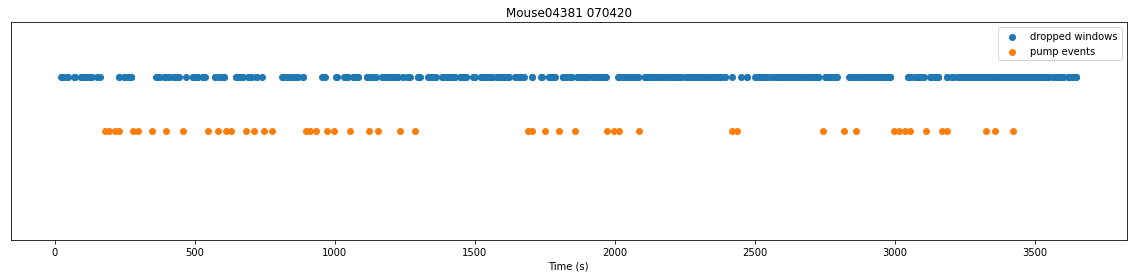

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04382, Num CD Windows / Num Events: 3.4778067885117494


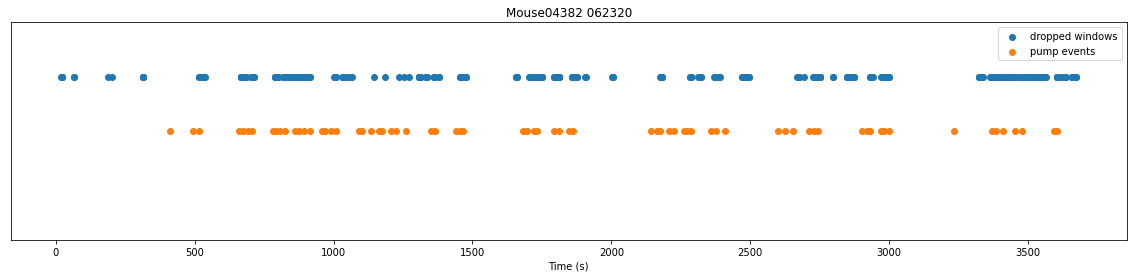

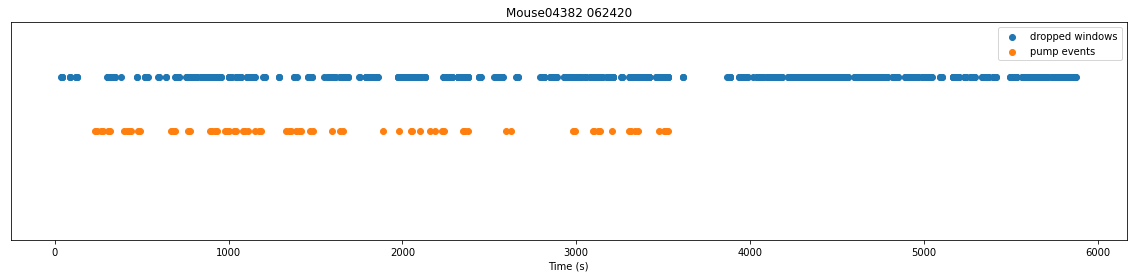

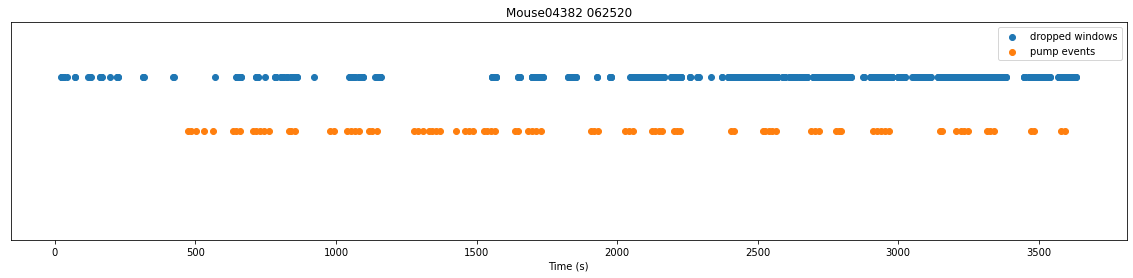

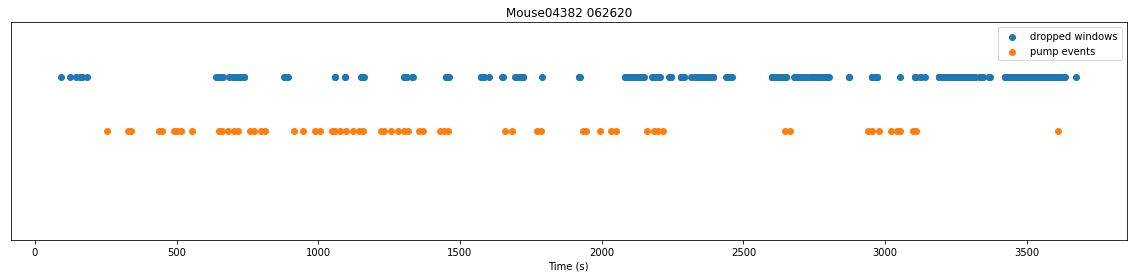

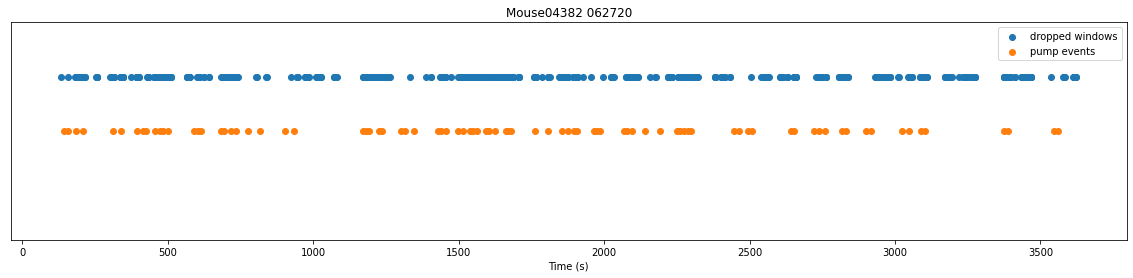

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04384, Num CD Windows / Num Events: 4.072727272727272


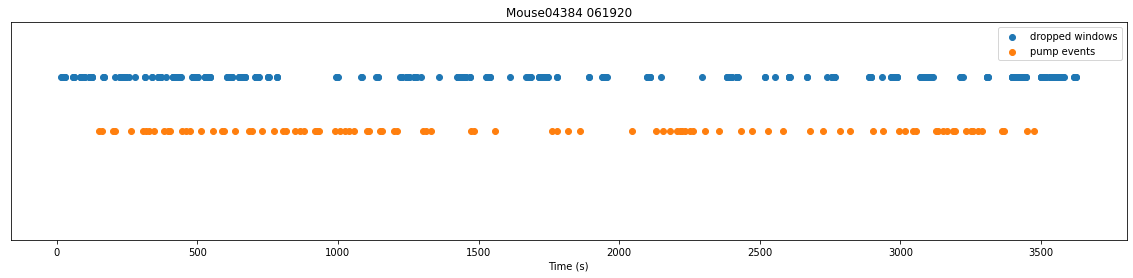

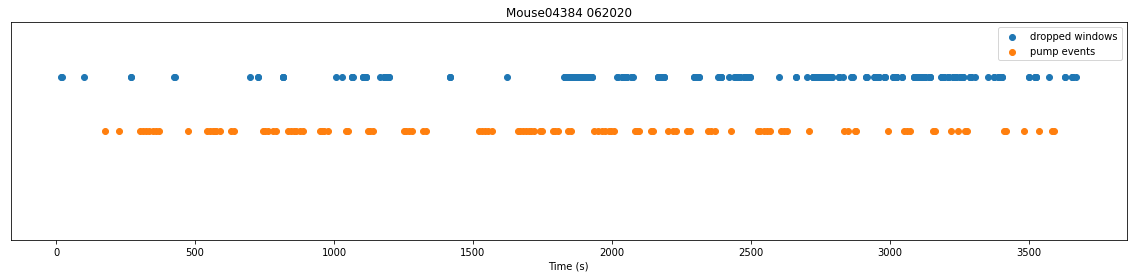

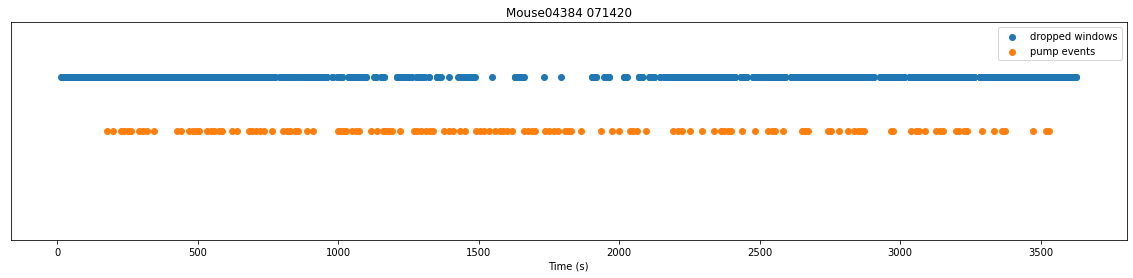

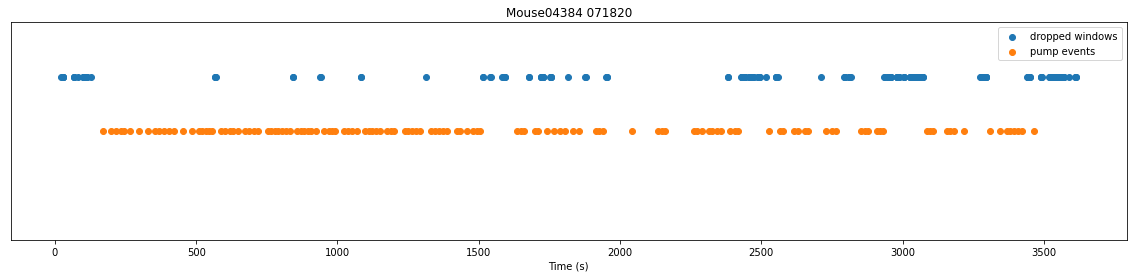

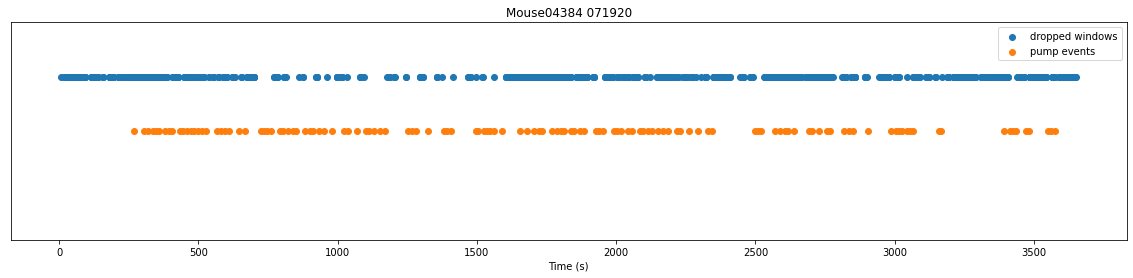

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04385, Num CD Windows / Num Events: 4.851851851851852


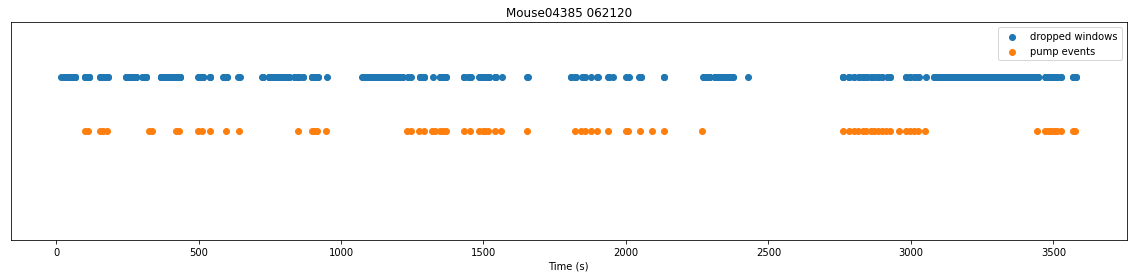

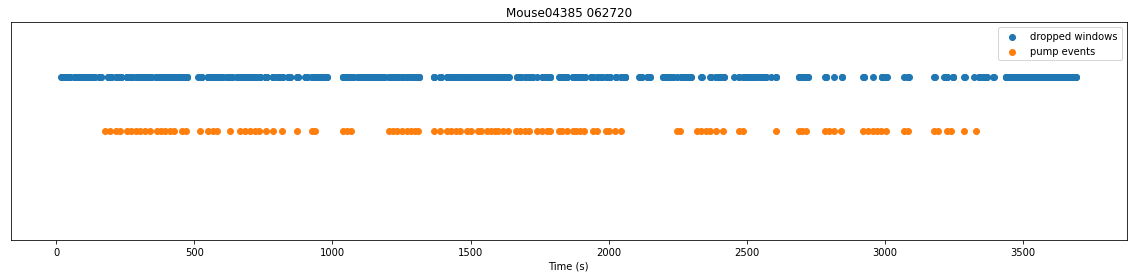

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04391, Num CD Windows / Num Events: 2.9207920792079207


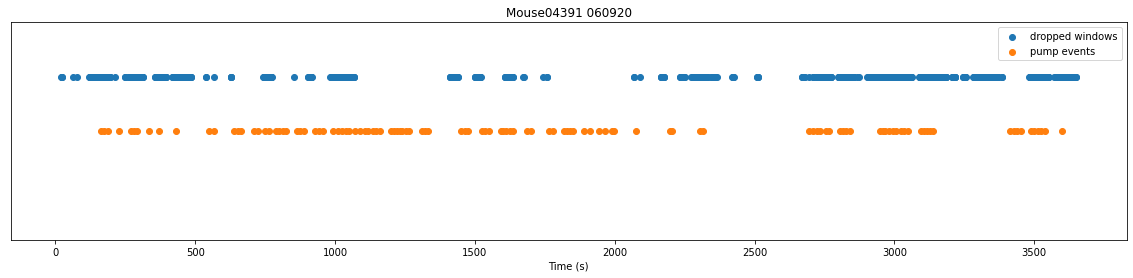

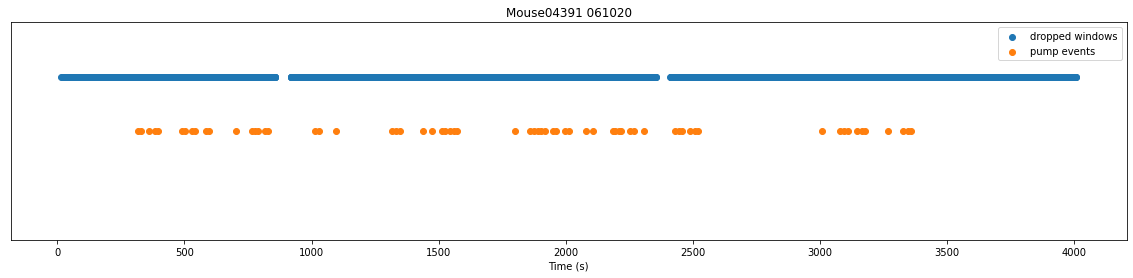

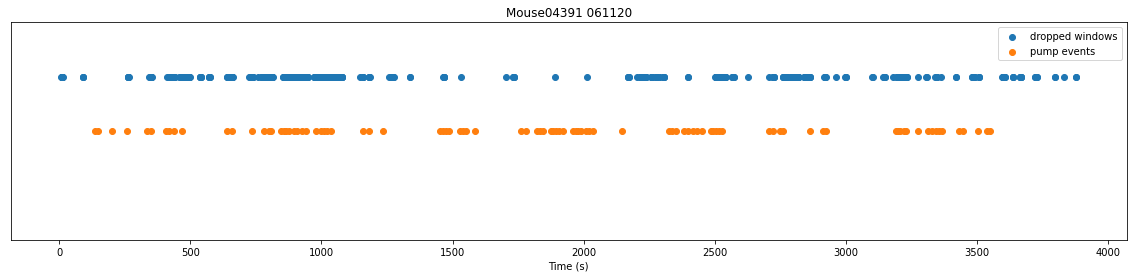

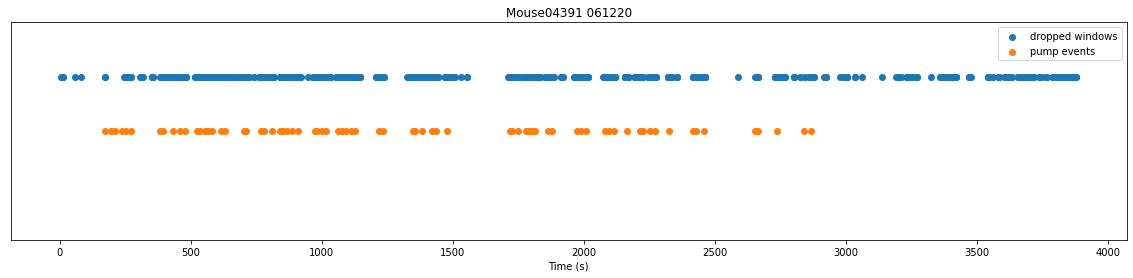

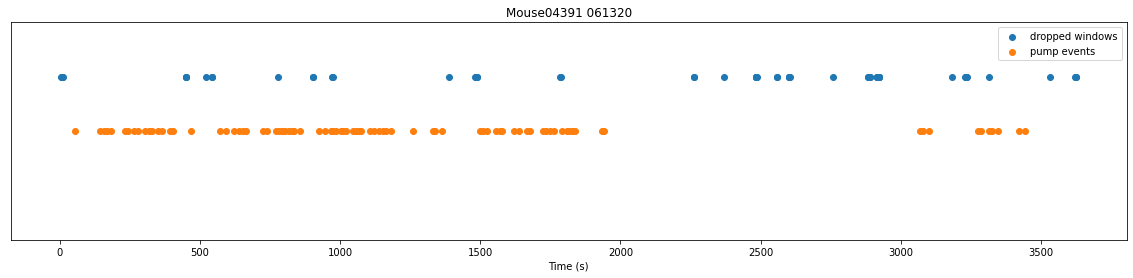

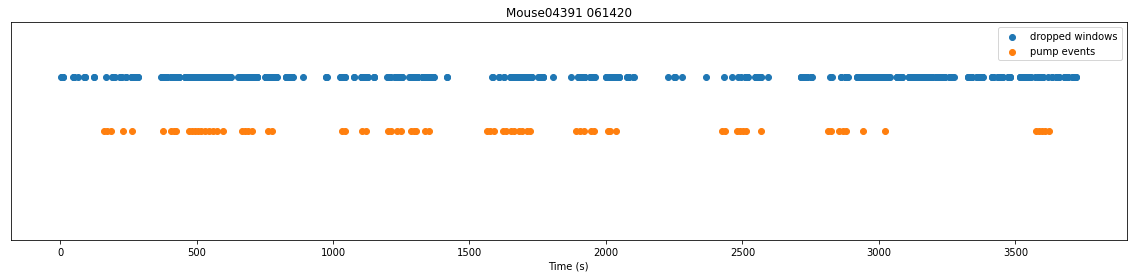

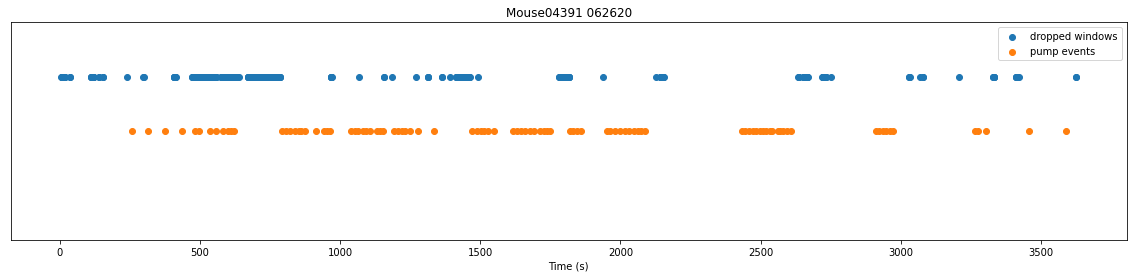

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04392, Num CD Windows / Num Events: 3.5916955017301038


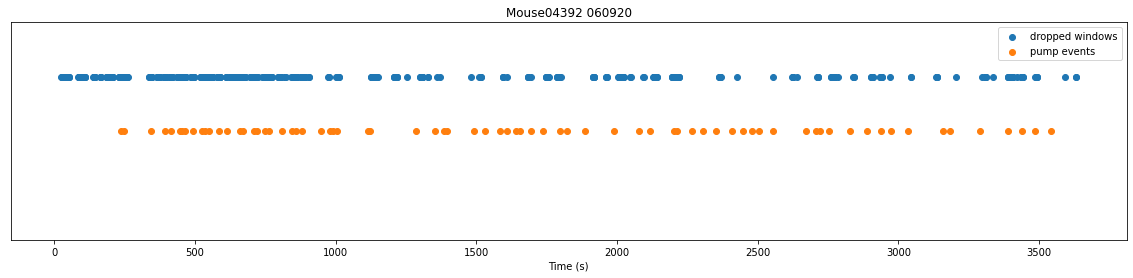

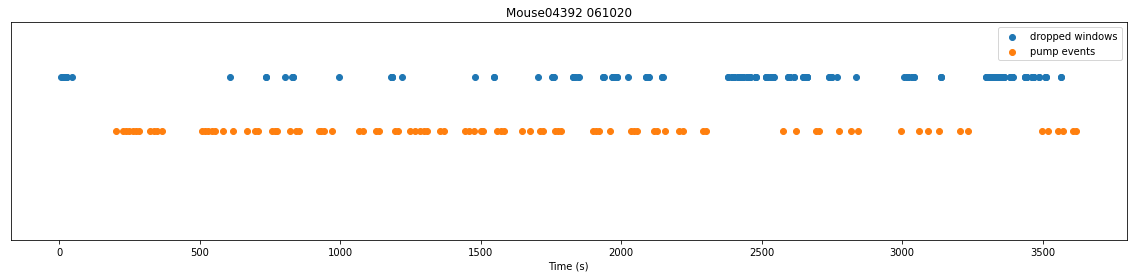

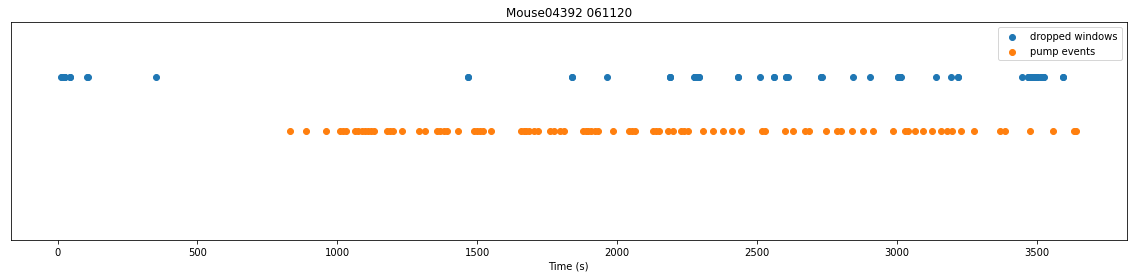

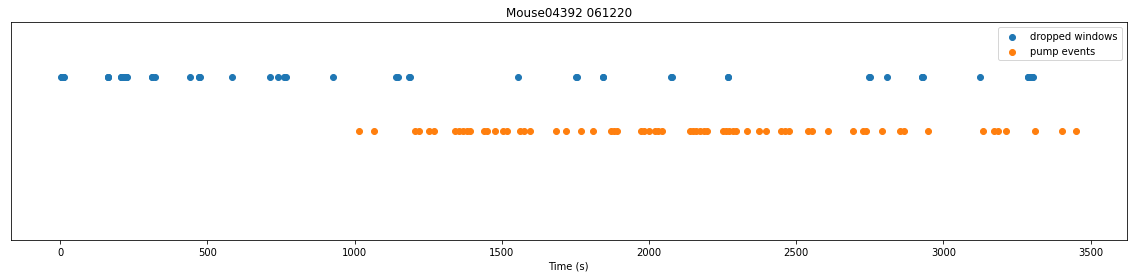

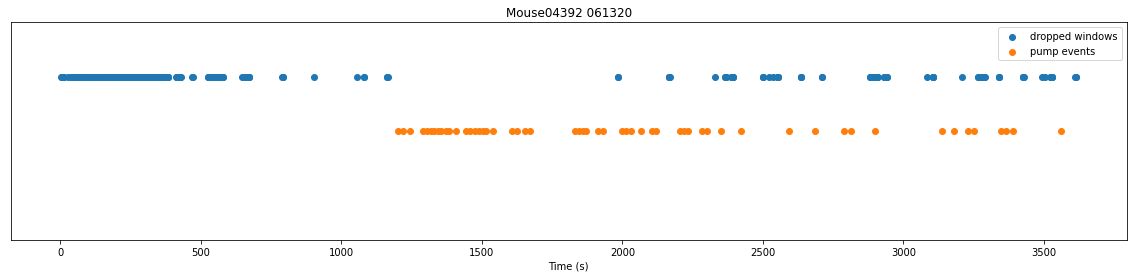

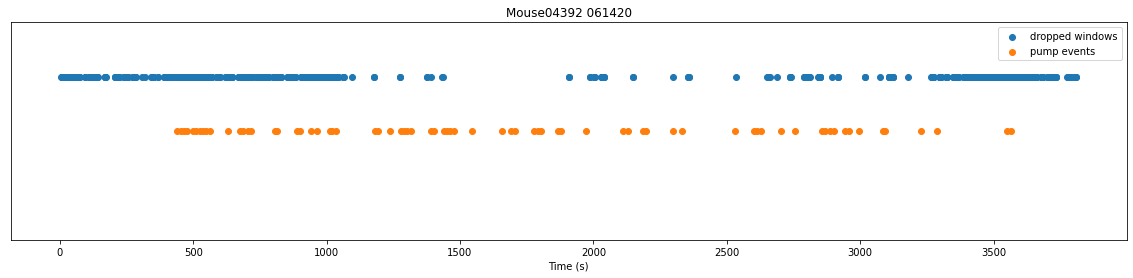

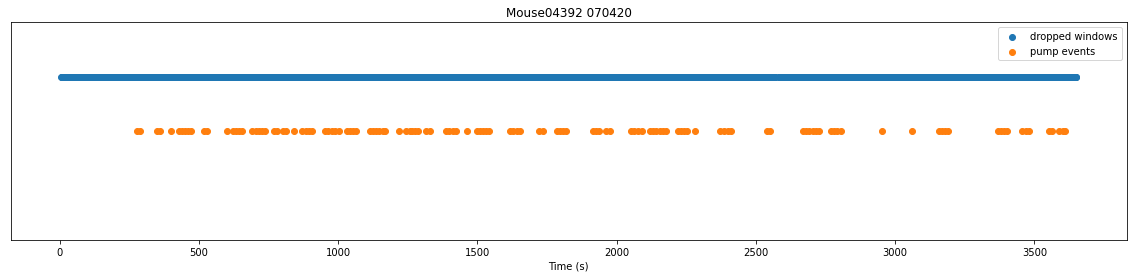

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04393, Num CD Windows / Num Events: 4.851764705882353


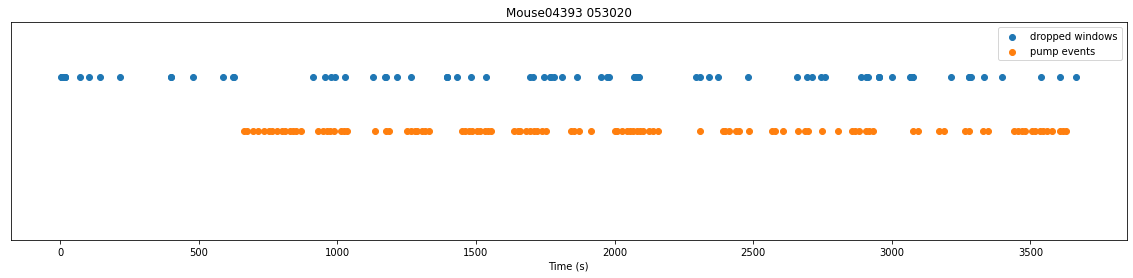

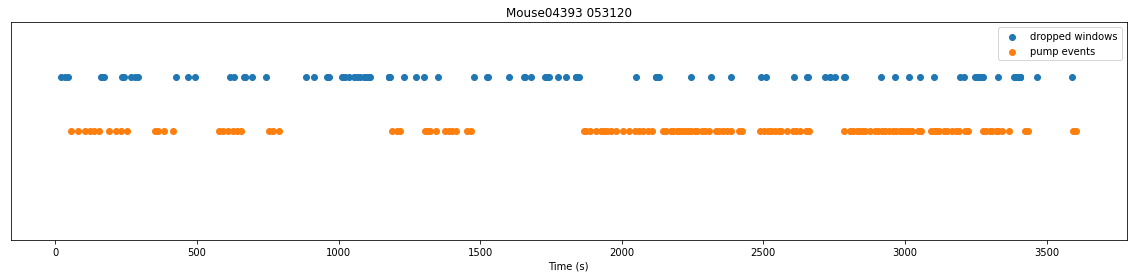

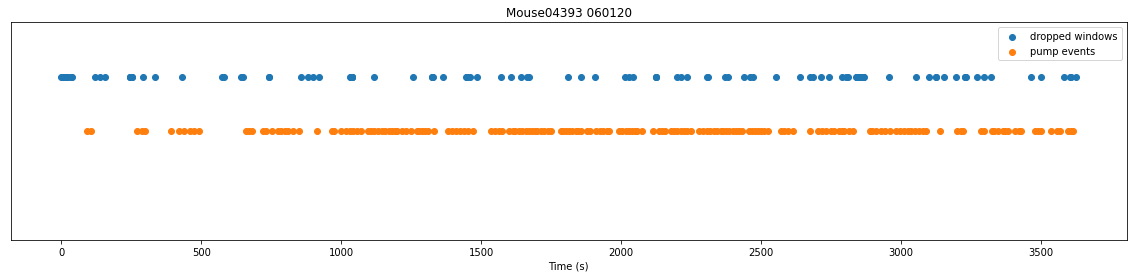

version saveFeatures_1.2 used to calcuate power features
version saveFeatures_1.2 used to calcuate coherence features
version saveFeatures_1.2 used to calcuate granger features
Version preprocessData_1.0 of preprocessing used
Make sure feature versions listed above match those used for any other dataset in the same project
Mouse: Mouse04394, Num CD Windows / Num Events: 4.46079779917469


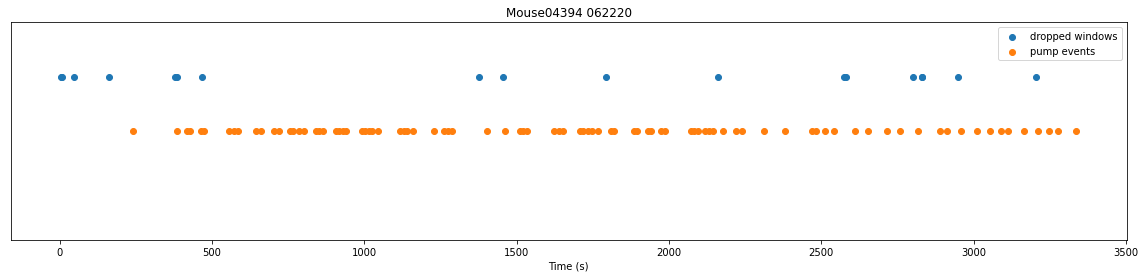

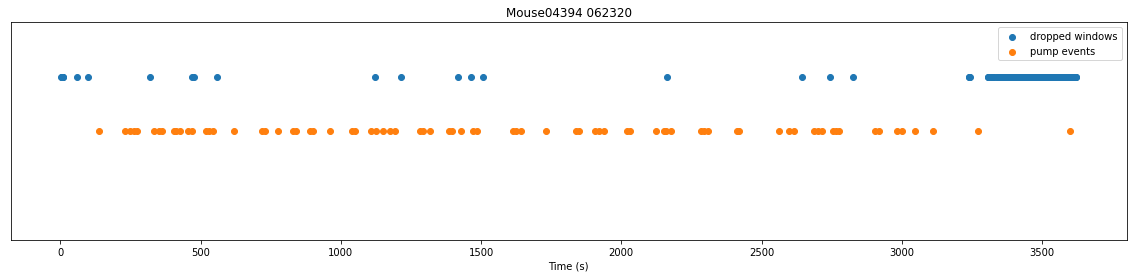

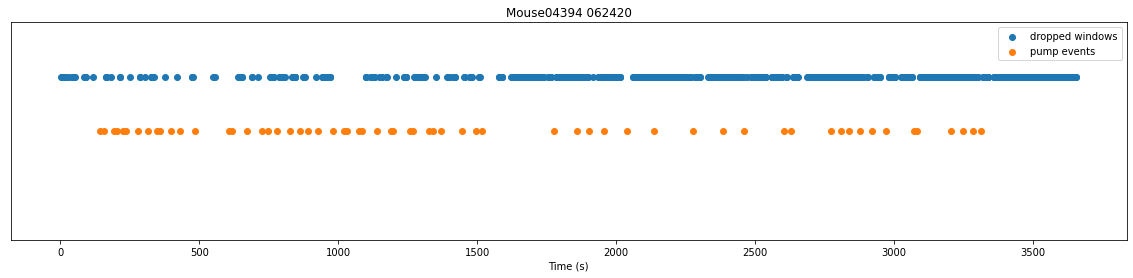

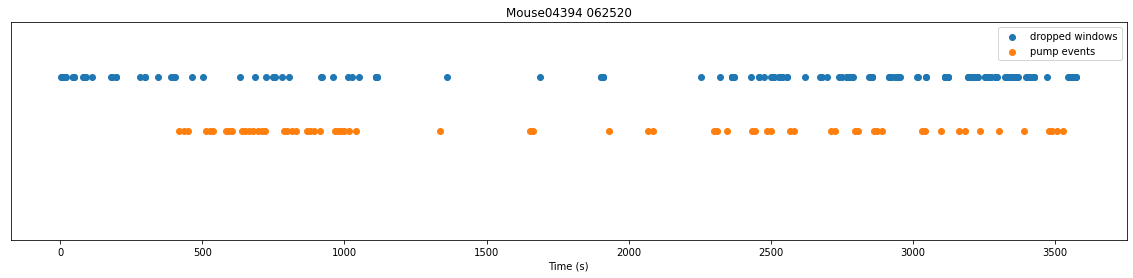

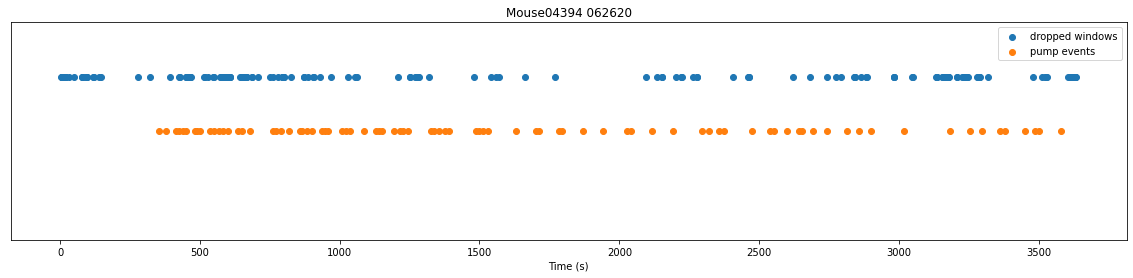

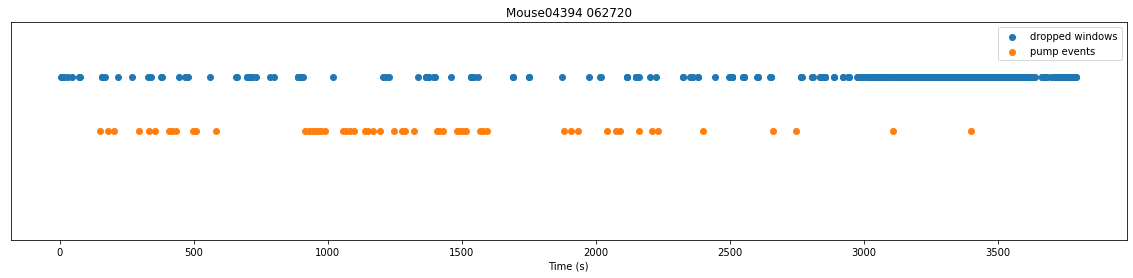

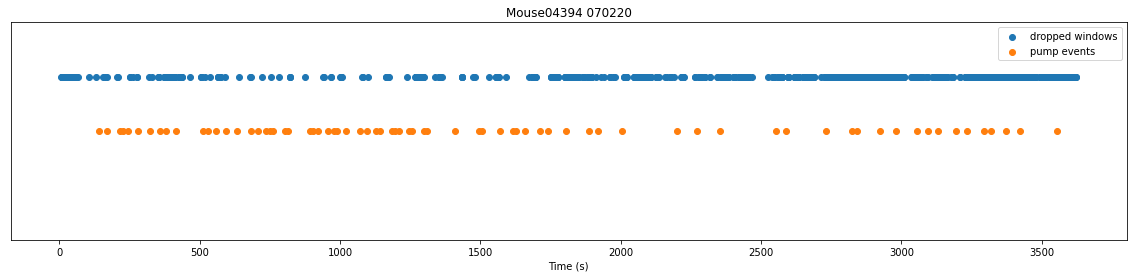

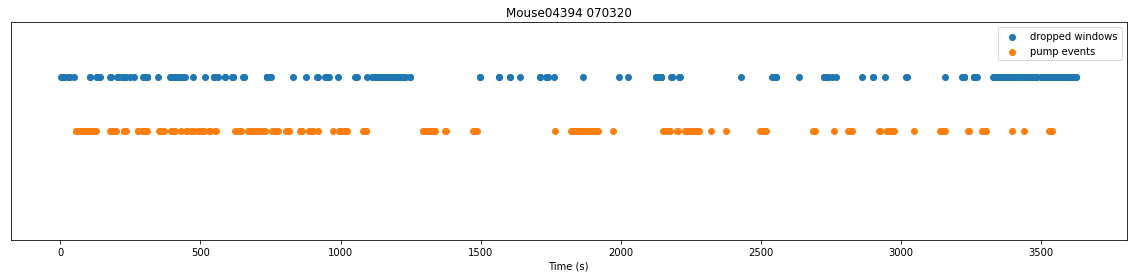

In [5]:
for matfile in mat_feature_files:
    
    try:
        X_psd,X_coh,X_gc,labels = data_tools.load_data(DATA_LOCATION + matfile, feature_list = ["power","coherence","granger"])
        mouse = matfile.split("_")[0]

        time_aw = np.array(labels['allWindows']['time'])
        time_w = np.array(labels['windows']['time'])

        expdate_aw = np.array(labels['allWindows']['expDate'])
        expdate_w = np.array(labels['windows']['expDate'])

        mask_aw = np.zeros(time_aw.shape)

        mouse = matfile.split("_")[0]

        countdownEvents = np.zeros(len(labels['windows']['expDate']))
        pumpEvents = np.zeros(len(labels['allWindows']['expDate']))

        mouse_class_files = [file for file in csv_files if file.split("_")[0]==mouse]

        mouse_num_events = 0

        for file in mouse_class_files:
            file_expdate = file.split("_")[1]
            if file_expdate in np.unique(expdate_aw):
                df = pd.read_csv(CLASS_DATA_LOCATION + file)

                pump_times = df["Pump"].to_numpy()
                pump_times = np.around(pump_times / 1000)


                expDate = file.split("_")[1]

                date_time = np.array(labels['windows']['time'])[np.array(labels['windows']['expDate'])==expDate]
                date_time_aw = np.array(labels['allWindows']['time'])[np.array(labels['allWindows']['expDate'])==expDate]
                day_events = np.zeros(date_time.shape)
                day_num_events = len(pump_times)

                day_pumps = np.zeros(date_time_aw.shape)
                day_pumps[pump_times.astype(int)] = 1

                for event in pump_times:
                    event_countdown_5s = np.logical_and(date_time<=event,date_time>(event-5))
                    day_events = np.logical_or(event_countdown_5s,day_events)

                mouse_mask = np.array(labels['windows']['mouse'])==mouse
                expDate_mask = np.array(labels['windows']['expDate'])==expDate
                event_mask = np.logical_and(mouse_mask,expDate_mask)

                mouse_mask_aw = np.array(labels['allWindows']['mouse'])==mouse
                expDate_mask_aw = np.array(labels['allWindows']['expDate'])==expDate
                event_mask_aw = np.logical_and(mouse_mask_aw,expDate_mask_aw)

                countdownEvents[event_mask==1] = day_events
                pumpEvents[event_mask_aw==1] = day_pumps
                mouse_num_events += day_num_events


        print("Mouse: {}, Num CD Windows / Num Events: {}".format(mouse, np.sum(countdownEvents) / mouse_num_events))

        for expDate in np.unique(labels['windows']['expDate']):
            temp_aw = time_aw[expdate_aw==expDate]
            temp_w = time_w[expdate_w==expDate]

            temp_pumps = pumpEvents[expdate_aw==expDate]

            drop_mask = np.array([0 if sec in temp_w else 1 for sec in temp_aw])
            mask_aw[expdate_aw==expDate] = drop_mask

            plt.figure(figsize=(20,4))
            #plt.plot(time_aw,time_aw)
            #plt.plot(time_w,time_w)
            plt.scatter(temp_aw[drop_mask==1],temp_aw[drop_mask==1]*0 + 1,label="dropped windows")
            plt.scatter(temp_aw[temp_pumps==1],temp_aw[temp_pumps==1]*0,label="pump events")
            plt.legend()
            plt.title(mouse + " " + expDate)
            plt.ylim(-2,2)
            plt.yticks([])
            plt.xlabel("Time (s)")
            plt.show()
    except:
        continue
        



In [206]:
temp_pumps.shape

(3654,)

In [208]:
temp_pumps

51.0

In [181]:
expdate_aw.shape

(3654,)

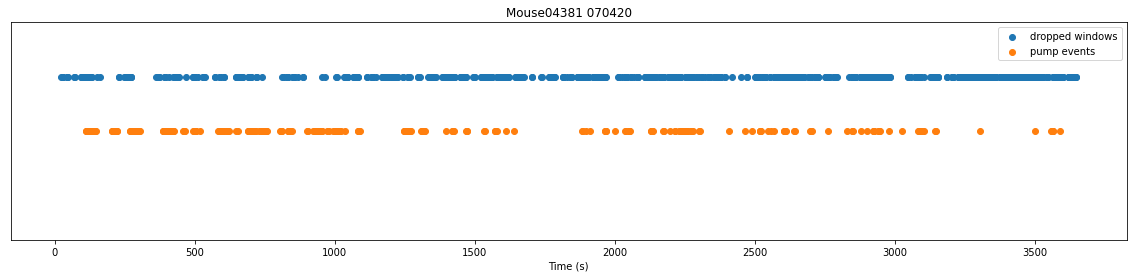

In [176]:
plt.figure(figsize=(20,4))
#plt.plot(time_aw,time_aw)
#plt.plot(time_w,time_w)
plt.scatter(time_aw[drop_mask==1],time_aw[drop_mask==1]*0 + 1,label="dropped windows")
plt.scatter(pump_times,pump_times*0,label="pump events")
plt.legend()
plt.title(mouse + " " + expDate)
plt.ylim(-2,2)
plt.yticks([])
plt.xlabel("Time (s)")
plt.show()

(array([21., 19., 15., 12.,  8.,  4.,  4.,  4.,  4.,  4.]),
 array([0.        , 0.20214521, 0.40429042, 0.60643563, 0.80858085,
        1.01072606, 1.21287127, 1.41501648, 1.61716169, 1.8193069 ,
        2.02145212]),
 <BarContainer object of 10 artists>)

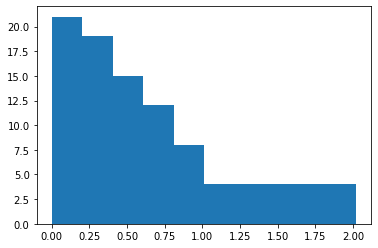

In [119]:
for matfile in mat_feature_files:
    
    try:
        X_psd,X_coh,X_gc,labels = data_tools.load_data(DATA_LOCATION + matfile, feature_list = ["power","coherence","granger"])

        mouse = matfile.split("_")[0]

        countdownEvents = np.zeros(len(labels['windows']['expDate']))

        mouse_class_files = [file for file in csv_files if file.split("_")[0]==mouse]

        mouse_num_events = 0

        for file in mouse_class_files:
            df = pd.read_csv(CLASS_DATA_LOCATION + file)

            pump_times = df["Pump"].to_numpy()
            pump_times = np.around(pump_times / 1000)

            expDate = file.split("_")[1]

            date_time = np.array(labels['windows']['time'])[np.array(labels['windows']['expDate'])==expDate]
            day_events = day_events = np.zeros(date_time.shape)
            day_num_events = len(pump_times)

            for event in pump_times:
                event_countdown_5s = np.logical_and(date_time<=event,date_time>(event-5))
                day_events = np.logical_or(event_countdown_5s,day_events)

            mouse_mask = np.array(labels['windows']['mouse'])==mouse
            expDate_mask = np.array(labels['windows']['expDate'])==expDate

            event_mask = np.logical_and(mouse_mask,expDate_mask)

            countdownEvents[event_mask==1] = day_events

            mouse_num_events += day_num_events

        print("Mouse: {}, Num CD Windows / Num Events: {}".format(mouse, np.sum(countdownEvents) / mouse_num_events))
        
    except:
        print("Failed to Process File: {}".format(matfile))